<a href="https://colab.research.google.com/github/alagredoub/ProyectoTweets/blob/main/Airline_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
data = train_data.copy()

In [10]:
def change_into_data(col):
  data[col] = pd.to_datetime(data[col])

In [11]:
for i in ['Dep_Time','Date_of_Journey','Arrival_Time']:
  change_into_data(i)

<ipython-input-10-f5eb2484d380>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col] = pd.to_datetime(data[col])


In [12]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [14]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [15]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_day']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_day, Length: 10682, dtype: int64

In [16]:
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_month']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Journey_month, Length: 10682, dtype: int64

In [17]:
data['Journey_year'] = data['Date_of_Journey'].dt.year
data['Journey_year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Journey_year, Length: 10682, dtype: int64

In [18]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-21 05:50:00,2023-04-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [19]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
def extract_hour_min(df,col):
  df[col+'hour'] = df[col].dt.hour
  df[col+'minute'] = df[col].dt.minute
  df.drop(col,axis=1,inplace=True)
  return df.head(2)

In [21]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [22]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [23]:
def flight_dep_time(x):
  if x>4 and x<=8:
    return 'Early'
  elif x>8 and x<=12:
    return 'Morning'
  elif x>12 and x<=16:
    return 'Noon'
  elif x>16 and x<=20:
    return 'Evening'
  elif x>20 and x<= 24:
    return 'Night'
  else:
    return 'Late Night'

In [24]:
data['Dep_Timehour'].apply(flight_dep_time)

0          Night
1          Early
2        Morning
3        Evening
4           Noon
          ...   
10678    Evening
10679    Evening
10680      Early
10681    Morning
10682    Morning
Name: Dep_Timehour, Length: 10682, dtype: object

<Axes: >

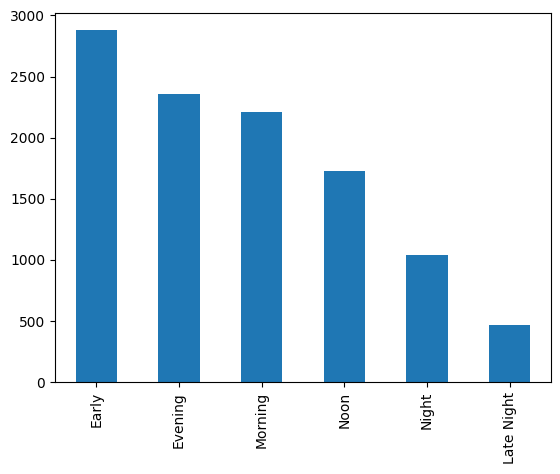

In [25]:
data['Dep_Timehour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [26]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [27]:
#pip install plotly

In [28]:
#pip install chart_studio

In [29]:
#pip install cufflinks

In [30]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [31]:
#data['Dep_Timehour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [32]:
def preprocess_Duration(x):
  if 'h' not in x:
    x = '0h '+x
  elif 'm' not in x:
    x = x+' 0m'
  return x

In [33]:
data['Duration'] = data['Duration'].apply(preprocess_Duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [34]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [35]:
data['Duration_hour'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]) )

In [36]:
data['Duration_minute'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]) )

In [37]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [38]:
data['Duration_total_min'] = data['Duration'].str.replace('h','*60').str.replace('m','*1').str.replace(' ','+').apply(eval)

In [39]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


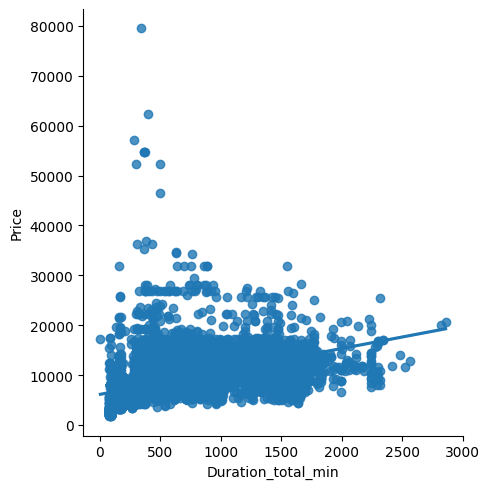

In [40]:
sns.lmplot(x='Duration_total_min',y= 'Price', data=data)

In [41]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [42]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: ylabel='Destination'>

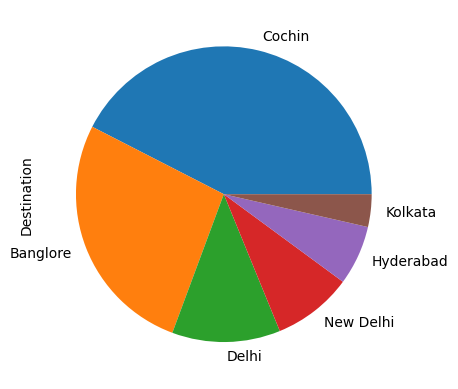

In [43]:
data['Destination'].value_counts().plot(kind='pie')

In [44]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [46]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

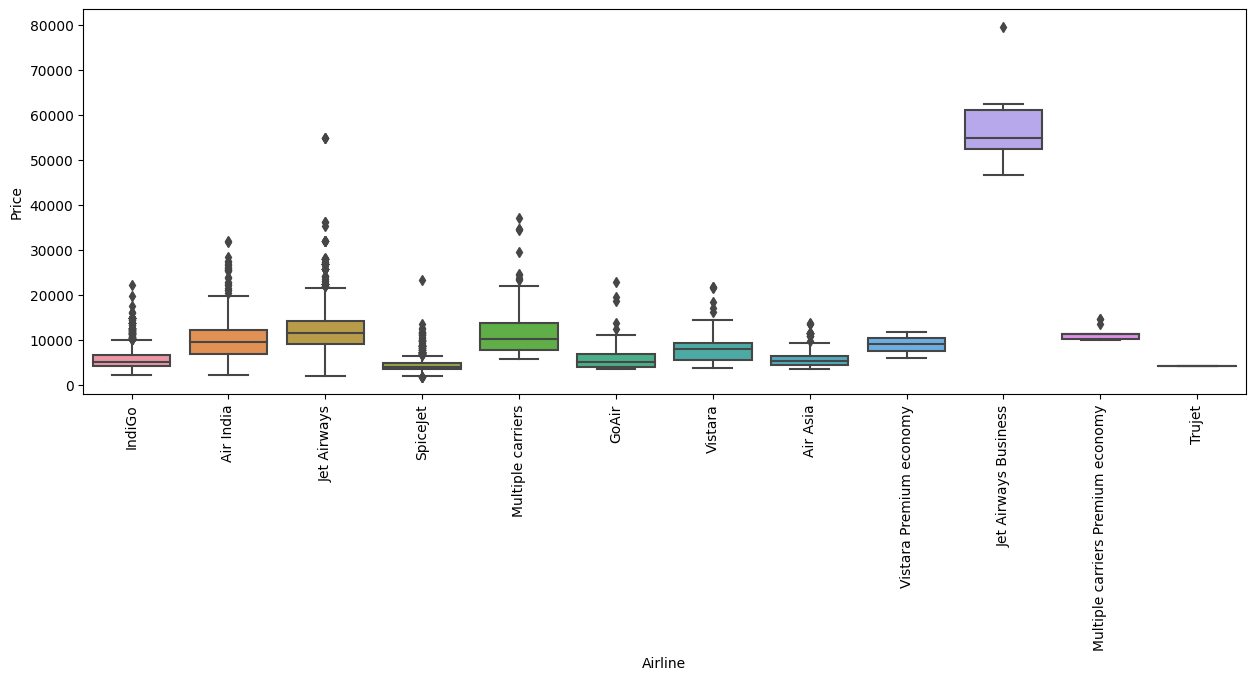

In [47]:
plt.figure(figsize = (15,5))
sns.boxplot(y='Price', x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

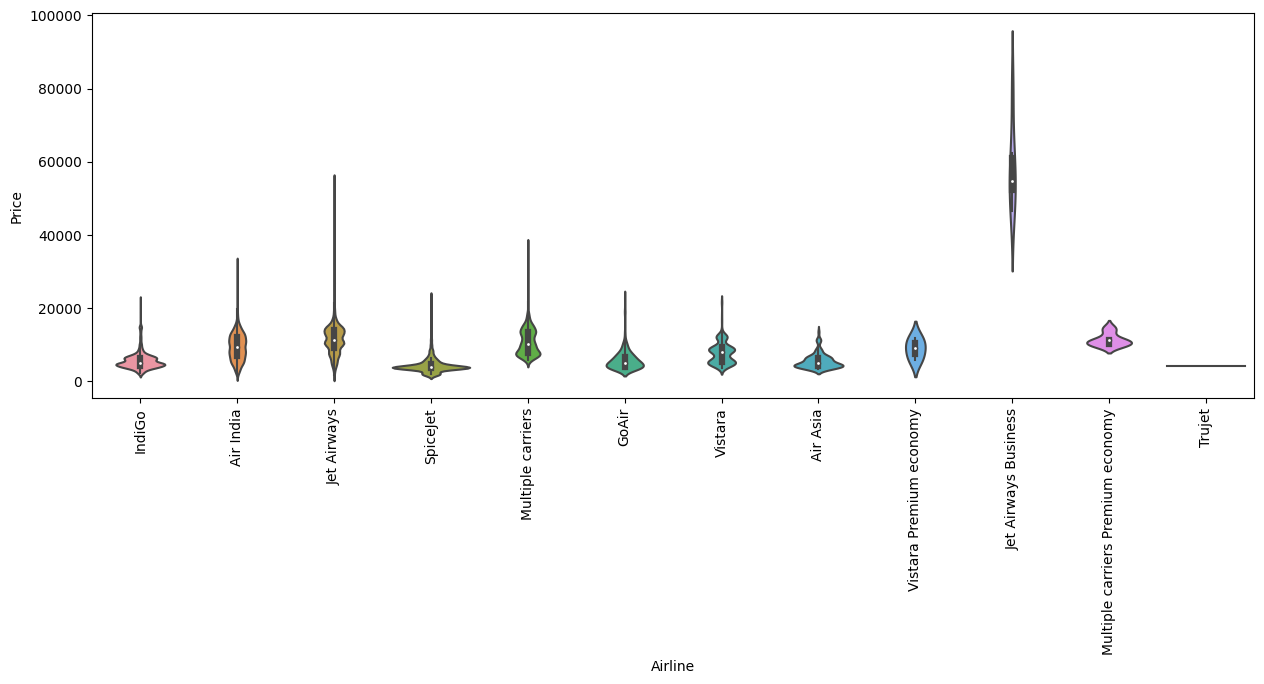

In [48]:
plt.figure(figsize = (15,5))
sns.violinplot(y='Price', x='Airline',data=data)
plt.xticks(rotation='vertical')

In [49]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


In [50]:
data.drop(columns = ['Route','Additional_Info','Duration_total_min','Journey_year'],axis=1,inplace=True)


In [51]:
cat_col = [col for  col in data.columns if data[col].dtype == 'object']

In [52]:
num_col = [col for  col in data.columns if data[col].dtype != 'object']

In [53]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [55]:
for cat in data['Source'].unique():
  data['Source_'+cat] = data['Source'].apply(lambda x: 1 if x == cat else 0)

In [56]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [57]:
dic1 = {key:index for index,key in enumerate(airlines,0)}

In [58]:
data['Airline'] = data['Airline'].map(dic1)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [59]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [60]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [61]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [62]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [63]:
dic2 = {key:index for index,key in enumerate(dest,0)}

In [64]:
data['Destination'] = data['Destination'].map(dic2)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [65]:
# let's go to do the same idea but de manual form.
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
stops = {'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}


In [67]:
data['Total_Stops']= data['Total_Stops'].map(stops)
data['Total_Stops']

0        0
1        1
2        1
3        2
4        2
        ..
10678    0
10679    0
10680    0
10681    0
10682    1
Name: Total_Stops, Length: 10682, dtype: int64

In [68]:
# How handle outliers data, its important for Machine learning model

def plot(df,col):
  fig,(ax1,ax2,ax3) = plt.subplots(3,1)
  sns.distplot(df[col],ax = ax1)
  sns.boxplot(df[col],ax = ax2,orient = 'Horizontal' )
  sns.distplot(df[col],ax = ax3, kde = False)



<ipython-input-68-ff5220b736dc>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-68-ff5220b736dc>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




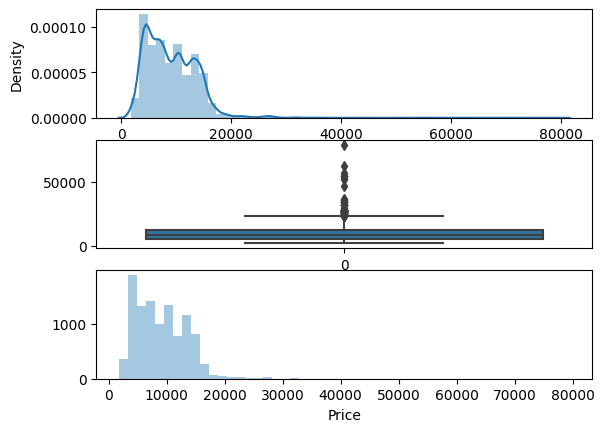

In [69]:
plot(data,'Price')

In [70]:
# I choose 35000 because after this price the values are consider outliers, 
data['Price'] = np.where(data['Price']>= 35000,data['Price'].median(),data['Price'])


<ipython-input-68-ff5220b736dc>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-68-ff5220b736dc>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




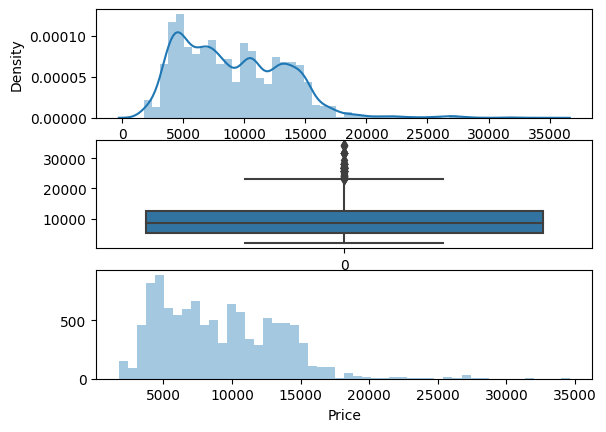

In [71]:
plot(data,'Price')

In [72]:
# Then let's go to understand " select features"
data.drop(columns= ['Source','Duration'], axis=1, inplace=True)

In [73]:
# See the type object that we have
data.dtypes

Airline                 int64
Destination             int64
Total_Stops             int64
Price                 float64
Journey_day             int64
Journey_month           int64
Dep_Timehour            int64
Dep_Timeminute          int64
Arrival_Timehour        int64
Arrival_Timeminute      int64
Duration_hour           int64
Duration_minute         int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [74]:
from sklearn.feature_selection import mutual_info_regression


In [75]:
X = data.drop(['Price'],axis=1)

In [76]:
y = data['Price']

In [77]:
mutual_info_regression(X,y)

array([0.97575791, 0.99468548, 0.78862641, 0.19056327, 0.23954345,
       0.33843766, 0.26685598, 0.39769811, 0.3520976 , 0.46995743,
       0.34860992, 0.39396659, 0.4574974 , 0.51905423, 0.13450628,
       0.20474645])

In [78]:
imp = pd.DataFrame(mutual_info_regression(X,y), index = X.columns)
imp.columns=['Importance']
imp.sort_values(by='Importance', ascending =False)

,Importance
Destination,1.011883
Airline,0.971315
Total_Stops,0.783758
Source_Delhi,0.525187
Duration_hour,0.465492
Source_Kolkata,0.447354
Source_Banglore,0.392947
Arrival_Timehour,0.392629
Arrival_Timeminute,0.349996
Duration_minute,0.342922


In [79]:
# let's go to apply machine learning model
from sklearn.model_selection import train_test_split


In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state = 42)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
model =  RandomForestRegressor()
model = model.fit (X_train,y_train)

In [83]:
y_pred = model.predict(X_test)

In [89]:
# let's go to save this model an this notebook in the ram o in the 
import pickle

In [96]:
file = open(r'C:\Users\ASUS X505Z\Desktop\Data science project/rf_random.pkl','wb')

FileNotFoundError: ignored